# Annual distribution of precipitation at four key locations
29th October 2023


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
bcm_df = pd.read_csv('data/outputs/rbcm_tr_2rcm_1961_locs.csv')
bcm_df['time'] = pd.to_datetime(bcm_df['time'])

In [80]:
bcm_df.head()

,time,lon,lat,pred0,var0,y_pred,95th_u,95th_l,CI
0,1961-01-01,75.0,36.0,0.592335,0.320504,3.044786,7.149868,1.097559,6.052310
1,1961-01-01,85.0,29.0,0.687143,0.321692,3.295319,7.650580,1.203190,6.447390
2,1961-01-01,95.0,30.0,0.546855,0.320481,2.930165,6.923622,1.048835,5.874786
3,1961-01-01,85.0,32.5,-0.249043,0.320568,1.427209,3.796539,0.461600,3.334939
4,1961-02-01,75.0,36.0,0.785695,0.318833,3.572988,8.160088,1.331344,6.828744


In [64]:
bcm_df_monthly = bcm_df.groupby([bcm_df['lon'], bcm_df['lat'] ,bcm_df['time'].dt.month]).mean()

In [65]:
bcm_df_monthly.drop(columns=['time'], inplace=True)

In [66]:
bcm_df_monthly.reset_index(inplace=True)

In [81]:
bcm_df_monthly.head()


,lon,lat,time,pred0,var0,y_pred,95th_u,95th_l,CI
0,75.0,36.0,1,0.592335,0.320504,3.044786,7.149868,1.097559,6.052310
1,75.0,36.0,2,0.785695,0.318833,3.572988,8.160088,1.331344,6.828744
2,75.0,36.0,3,0.949086,0.318492,4.074240,9.109089,1.558205,7.550884
3,75.0,36.0,4,1.065173,0.318445,4.463171,9.836265,1.737925,8.098340
4,75.0,36.0,5,1.016983,0.318424,4.298300,9.528666,1.661434,7.867232


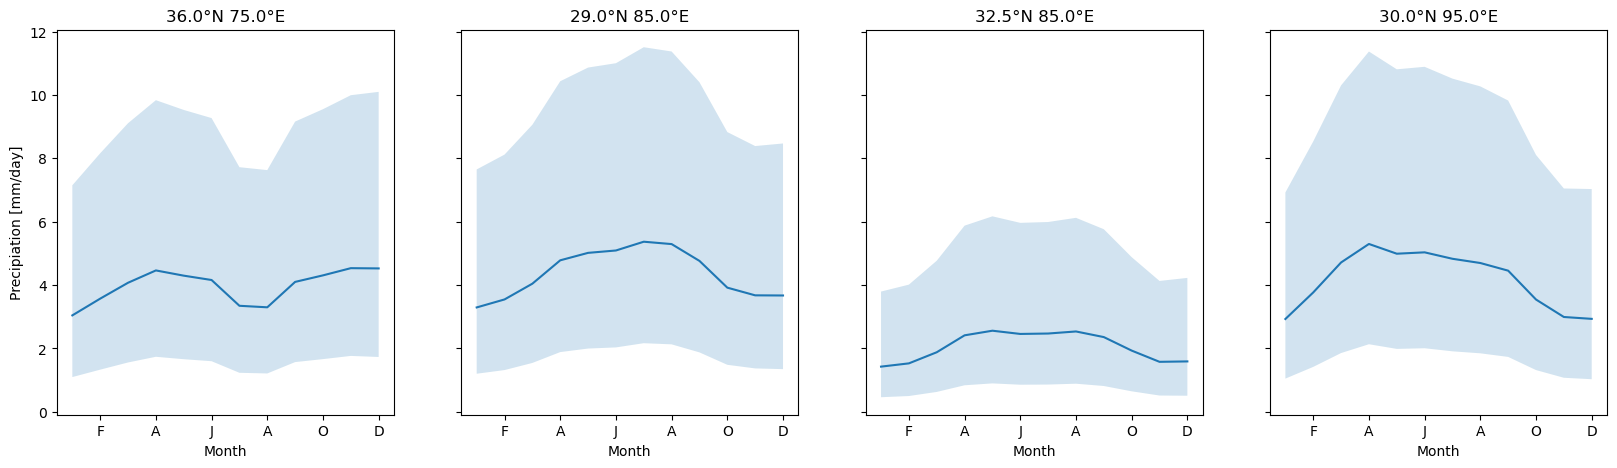

In [78]:
fig, ax = plt.subplots(1,4,figsize=(20, 5), sharey=True)

for i in range(4):
    s = i*12
    ax[i].plot(bcm_df_monthly.time[s:s+12], bcm_df_monthly.y_pred[s:s+12])
    ax[i].fill_between(bcm_df_monthly.time[s:s+12],
                       bcm_df_monthly['95th_l'][s:s+12],  bcm_df_monthly['95th_u'][s:s+12], alpha=0.2)
    ax[i].set_title(str(bcm_df_monthly.lat[s])+'°N ' + str(bcm_df_monthly.lon[s]) + '°E')
    ax[i].set_xticks(np.arange(2,13,2), ['F', 'A', 'J', 'A', 'O', 'D'])
    ax[i].set_xlabel('Month')

ax[0].set_ylabel('Precipiation [mm/day]')
plt.savefig('plots/loc_dist_test_2rcm_1961.png', dpi=300, bbox_inches='tight')